# Cargar los datos

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = r"C:\Users\Danie\OneDrive\Escritorio\training_model_exercise\MLA_100k.jsonlines"
df = pd.read_json(file_path, lines=True)

### Exploración inicial

In [6]:
# Dimensiones
print("Shape:", df.shape)

# Columnas
print("Columnas:", df.columns)

# Tipos de datos
print(df.dtypes)

# Muestra de filas
df.head(15)


Shape: (100000, 48)
Columnas: Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')
seller_address                                   object
warranty                                    

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1
5,"{'comment': '', 'longitude': -58.5373541, 'id'...",Sí,[],new,None,[],310.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",93122911,...,active,None,NaN,NaN,1,2015-08-30 14:24:01+00:00,http://articulo.mercadolibre.com.ar/MLA-576999...,"{'latitude': -34.5173889, 'longitude': -58.537...",0,1
6,"{'comment': '', 'longitude': -58.3767787, 'id'...",None,[],used,None,[],180.0,"{'local_pick_up': True, 'methods': [], 'tags':...",[],82247584,...,active,None,NaN,NaN,1,2015-10-06 22:32:41+00:00,http://articulo.mercadolibre.com.ar/MLA-583349...,"{'latitude': -34.6428264, 'longitude': -58.376...",0,1
7,"{'comment': '', 'longitude': -58.4927597, 'id'...",None,[],used,None,[],150.0,"{'local_pick_up': False, 'methods': [], 'tags'...","[{'description': 'Transferencia bancaria', 'id...",40903230,...,active,None,NaN,NaN,1,2015-10-14 19:36:52+00:00,http://articulo.mercadolibre.com.ar/MLA-584657...,"{'latitude': -34.6507416, 'longitude': -58.492...",0,1
8,"{'comment': '', 'longitude': -58.47917, 'id': ...",1 Ano,[],new,None,[],2352.0,"{'local_pick_up': True, 'free_methods': [{'rul...","[{'description': 'Tarjeta de crédito', 'id': '...",166958416,...,paused,QQNfOicE_o8,NaN,NaN,10,2015-09-30 21:50:22+00:00,http://articulo.mercadolibre.com.ar/MLA-582290...,"{'latitude': -34.58502, 'longitude': -58.47917}",0,10
9,"{'comment': '', 'longitude': -58.4900327, 'id'...",None,[],new,None,[],120.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Efectivo', 'id': 'MLAMO', 't...",20834268,...,active,None,NaN,NaN,2,2015-10-03 23:11:29+00:00,http://articulo.mercadolibre.com.ar/MLA-582819...,"{'latitude': -34.8113156, 'longitude': -58.490...",1,1


### Distribucion del target (new vs used)

<Axes: title={'center': 'Products distribution: New vs Used'}, xlabel='condition'>

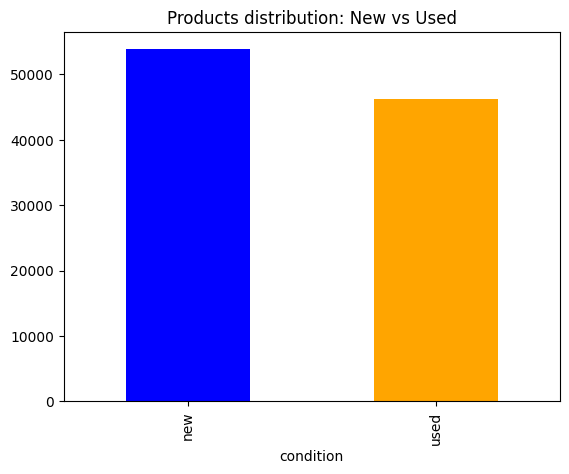

In [7]:
colors = ['blue', 'orange']
df['condition'].value_counts().plot(kind='bar', color=colors, title='Products distribution: New vs Used')

### Limpieza de datos nulos

In [8]:
df_clean = df[df['base_price'].notnull() & df['condition'].notnull()]

### Análisis de precios y cantidades

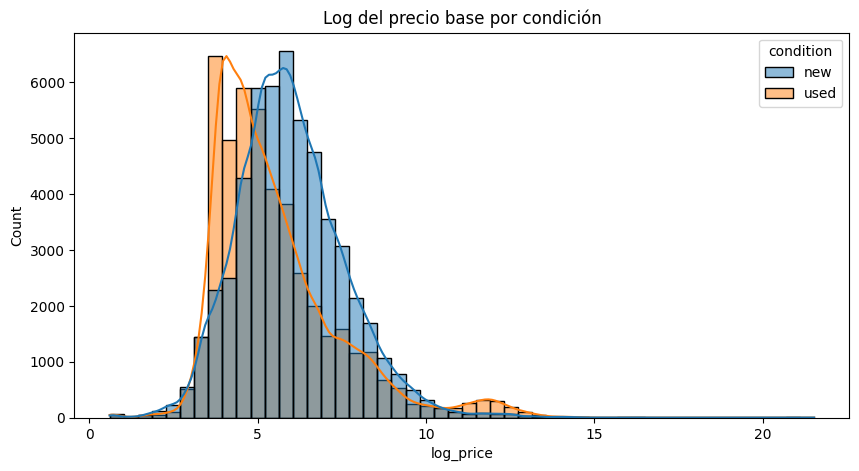

In [9]:
df['log_price'] = np.log1p(df['base_price'])

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='log_price', hue='condition', bins=50, kde=True)
plt.title('Log del precio base por condición')
plt.show()

# Transformation & Load

In [10]:
df_transformed = df_clean.copy()

df_transformed = df_transformed[df_transformed['condition'].isin(['new', 'used'])]
df_transformed['condition'] = df_transformed['condition'].map({'used': 0, 'new': 1})

df_transformed['has_warranty'] = df_transformed['warranty'].notnull().astype(int)

df_transformed['start_time'] = pd.to_datetime(df_transformed['start_time'], errors='coerce')
df_transformed['days_since_start'] = (pd.Timestamp.now(tz='UTC') - df_transformed['start_time']).dt.days
df_transformed.drop(columns='start_time', inplace=True)

status_dummies = pd.get_dummies(df_transformed['status'], prefix='status')
df_transformed = pd.concat([df_transformed, status_dummies], axis=1)
df_transformed.drop(columns='status', inplace=True)

# Columnas seleccionadas para el modelo
selected_columns = [
    'base_price',
    'available_quantity',
    'sold_quantity',
    'seller_id',
    'days_since_start',
    'has_warranty',
    'condition'
] + list(status_dummies.columns)

# Dataset final listo para el modelo
df_model = df_transformed[selected_columns].copy()

# Verificación
print("✅ Dataset preparado para el modelo. Dimensiones:", df_model.shape)
df_model.head()

✅ Dataset preparado para el modelo. Dimensiones: (100000, 11)


,base_price,available_quantity,sold_quantity,seller_id,days_since_start,has_warranty,condition,status_active,status_closed,status_not_yet_active,status_paused
0,80.0,1,0,74952096,3534,0,1,True,False,False,False
1,2650.0,1,0,42093335,3513,1,0,True,False,False,False
2,60.0,1,0,133384258,3529,0,0,True,False,False,False
3,580.0,1,0,143001605,3511,0,1,True,False,False,False
4,30.0,1,0,96873449,3545,1,0,True,False,False,False


### Guardar dataset transformado como csv

In [11]:
df_model.to_csv('clean_dataset.csv', index=False)

print("Dataset guardado como 'clean_dataset.csv'")

Dataset guardado como 'clean_dataset.csv'
